5 golden steps in machine learning
step 1 -> Importing essential libraries
step 2 -> Dataset Prepration
step 3 -> Division of dataset in testing and training dataset 
step 4 -> Model fit , train model, model test,model predict
step 5 -> conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
#keeps adelie and gentoo penguins , drop missing values
penguins_sub = df[df['species'] != 'Chinstrap']
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace = True, drop = True)

In [6]:
penguins_final

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
261,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
262,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
263,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


/home/harry/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


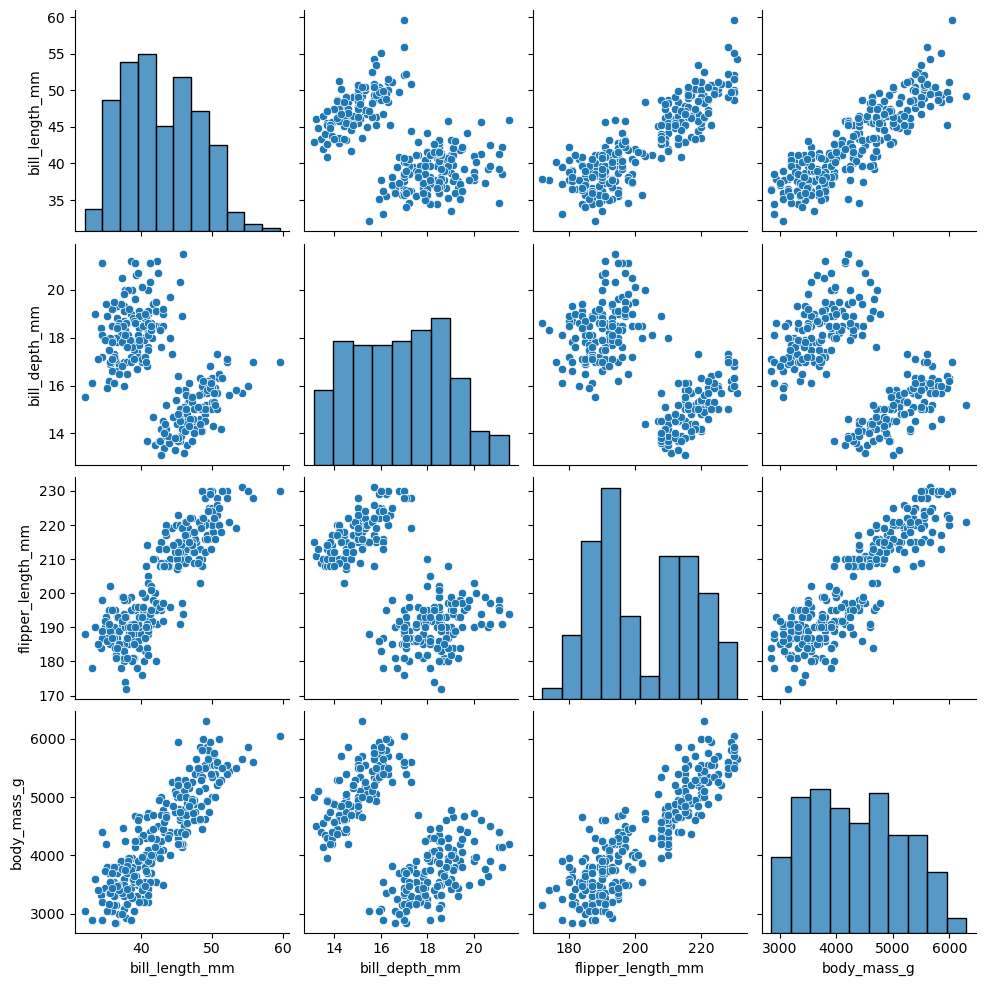

In [7]:
#EDA - create pairwise scatterplots of dataset
sns.pairplot(penguins_final)

In [8]:
#model construction
#subset data
ols_data = penguins_final[['bill_length_mm','body_mass_g']]
#ols formula
ols_formula = 'body_mass_g ~ bill_length_mm'

In [9]:
#import ols function(ordinary list square)
from statsmodels.formula.api import ols

In [10]:
#build ols, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.33e-85
Time:                        15:39:59   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

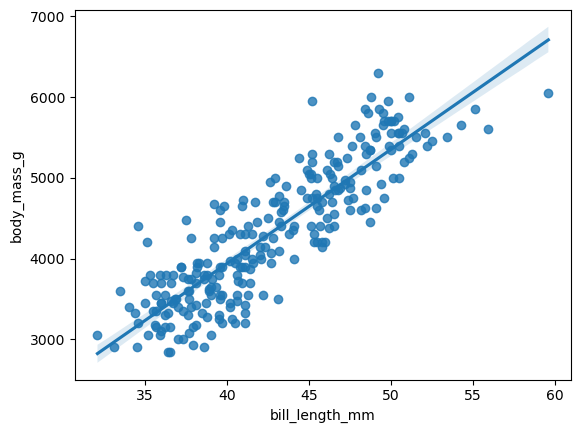

In [12]:
sns.regplot(x = 'bill_length_mm',y = 'body_mass_g',data = ols_data)

In [13]:
#subset x variable
X = ols_data['bill_length_mm']

#get redictions from meodel
fitted_values = model.predict(X)

#calculate resicudals
residuals = model.resid

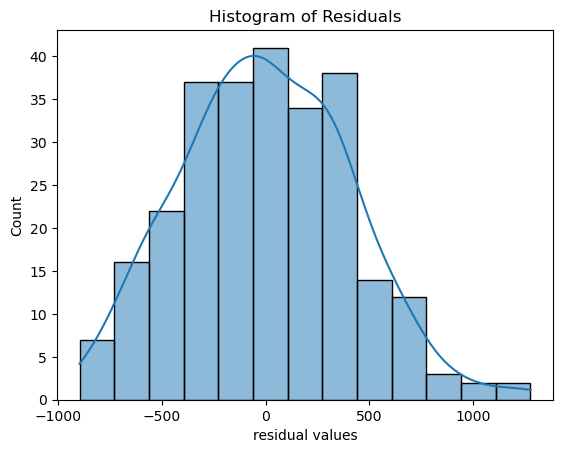

In [14]:
fig = sns.histplot(residuals,kde= True)
fig.set_xlabel("residual values")
fig.set_title("Histogram of Residuals")
plt.show()

### Predicting Exam Score Based on Study Hours #example

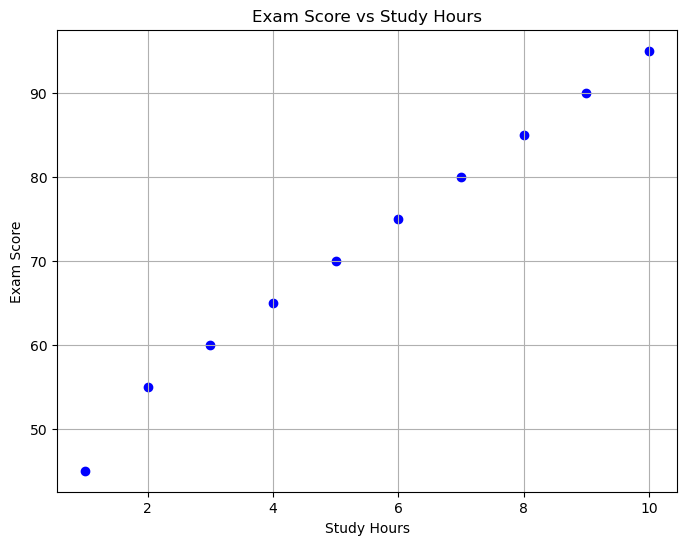

In [22]:
#Simulated data for study hours and exam scores

study_hours = np.array([1,2,3,4,5,6,7,8,9,10]) #input feature (X) 
exam_scores = np.array([45,55,60,65,70,75,80,85,90,95]) #Targeft variable (Y)

#Visualize the data
plt.figure(figsize=(8,6))
plt.scatter(study_hours,exam_scores, color = 'blue')
plt.title("Exam Score vs Study Hours")
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [32]:
#split Data into tarining and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets (80% trainin, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(study_hours.reshape(-1,1),exam_scores,test_size = 0.8,random_state= 42)

# Print shapes for debugging
print(f'X_train shape:{X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape:{X_test.shape}, y_test shape: {y_test.shape}')

X_train shape:(2, 1), y_train shape: (2,)
X_test shape:(8, 1), y_test shape: (8,)


Root Mean Squared Error(RMSE): 1.7677669529663689


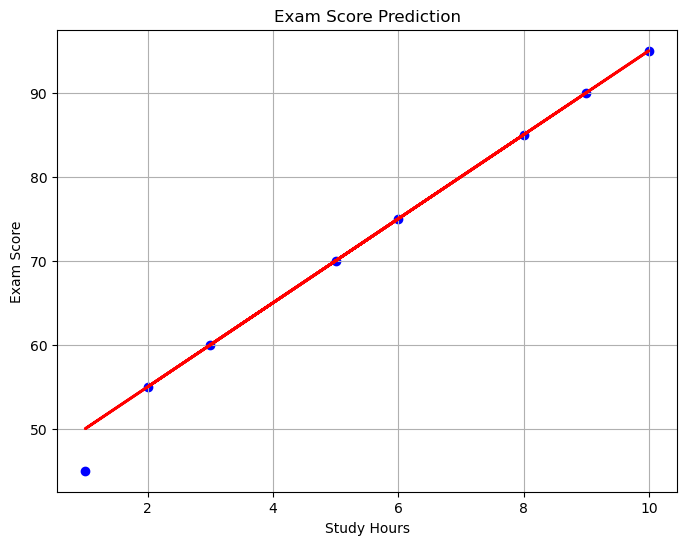

In [33]:
#Build and Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize the linear regression model
model= LinearRegression()

#Train the model
model.fit(X_train,y_train)

#Predict on the test data
y_pred = model.predict(X_test)

#Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE): {rmse}")

#plot the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red',linewidth = 2)
plt.title("Exam Score Prediction")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


In [34]:
#STep 4: Predict Exam Score for a New Study Hours
#predict exam score for a new study hour
new_study_hour = np.array([[7]]) #prdict for 7 hours of study

predicted_score = model.predict(new_study_hour)
print(f'Predicted exam score for {new_study_hour[0][0]} hours of study: {predicted_score[0]}')

Predicted exam score for 7 hours of study: 80.0


## Lets make the model some practicable

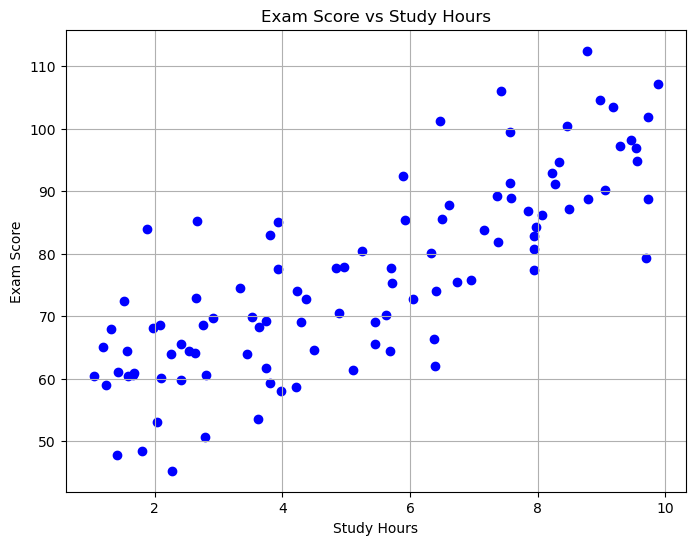

In [35]:
#Generate more realistic data with noise
np.random.seed(42)

#Simulate data for study hours and exam scores
study_hours = np.random.uniform(1,10,100) #Generate 200 study hours between 1 and 10
exam_scores = 50 + study_hours * 5 + np.random.normal(0,10,100) #Simulate exam scores with noise

#Visualize the data
plt.figure(figsize=(8,6))
plt.scatter(study_hours,exam_scores, color = 'blue')
plt.title("Exam Score vs Study Hours")
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [37]:
#split Data into tarining and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets (80% trainin, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(study_hours.reshape(-1,1),exam_scores,test_size = 0.2,random_state= 42)

# Print shapes for debugging
print(f'X_train shape:{X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape:{X_test.shape}, y_test shape: {y_test.shape}')

X_train shape:(80, 1), y_train shape: (80,)
X_test shape:(20, 1), y_test shape: (20,)


Root Mean Squared Error(RMSE): 8.085168605026128


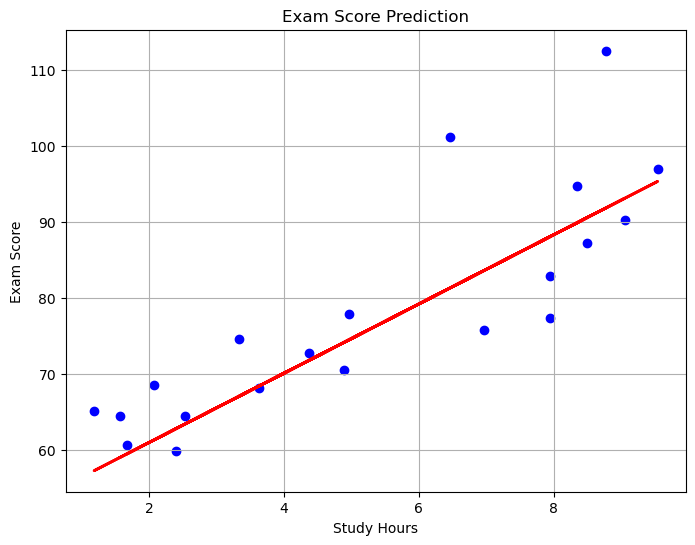

In [38]:
#Build and Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize the linear regression model
model= LinearRegression()

#Train the model
model.fit(X_train,y_train)

#Predict on the test data
y_pred = model.predict(X_test)

#Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE): {rmse}")

#plot the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red',linewidth = 2)
plt.title("Exam Score Prediction")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


In [39]:
#STep 4: Predict Exam Score for a New Study Hours
#predict exam score for a new study hour
new_study_hour = np.array([[5.5]]) #prdict for 7 hours of study

predicted_score = model.predict(new_study_hour)
print(f'Predicted exam score for {new_study_hour[0][0]} hours of study: {predicted_score[0]}')

Predicted exam score for 5.5 hours of study: 76.92236976938844
